# Prediction Using Decision Tree Algorithm

By - Aastha Singh

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn import tree


In [3]:
df= pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(columns = ['Id'], inplace= True)

In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


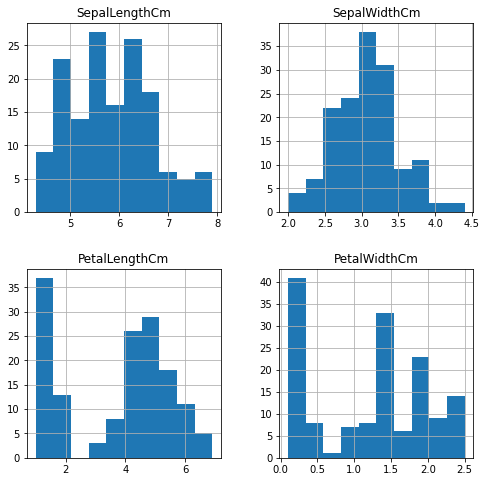

In [9]:
df.hist(figsize=(8,8))
plt.show()

<AxesSubplot:xlabel='count', ylabel='Species'>

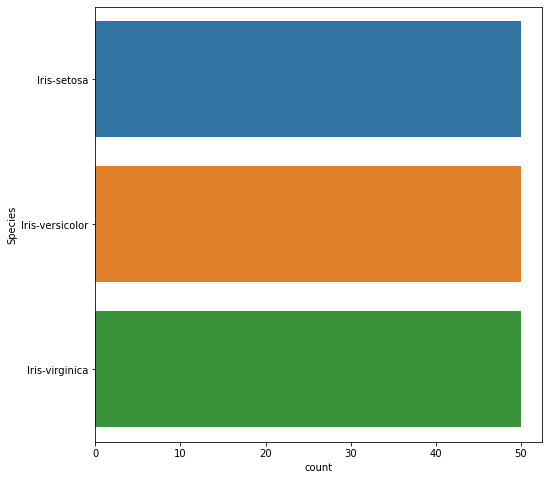

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(y='Species', data=df)

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

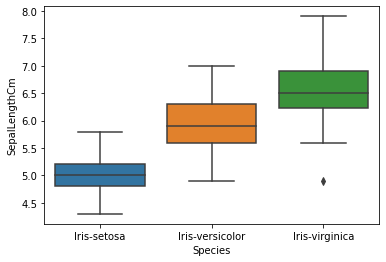

In [11]:
sns.boxplot(x='Species',y='SepalLengthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

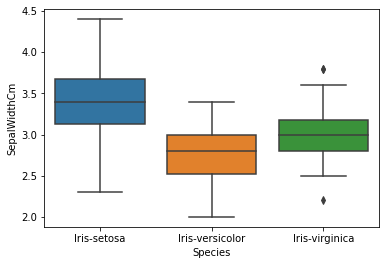

In [12]:
sns.boxplot(x='Species',y='SepalWidthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

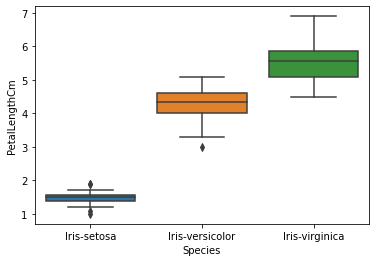

In [13]:
sns.boxplot(x='Species',y='PetalLengthCm', data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

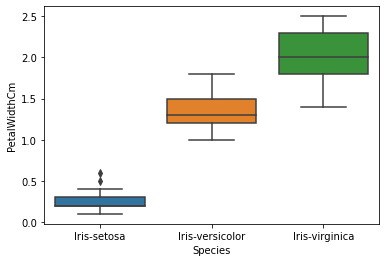

In [14]:
sns.boxplot(x='Species',y='PetalWidthCm', data=df)

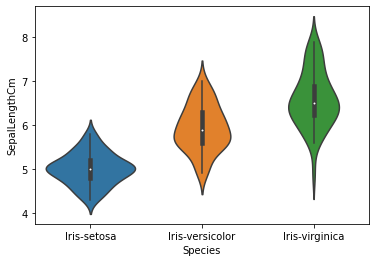

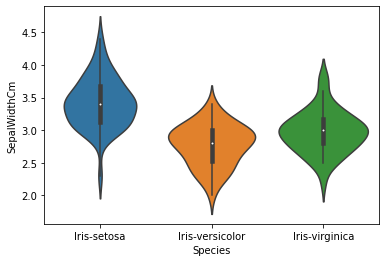

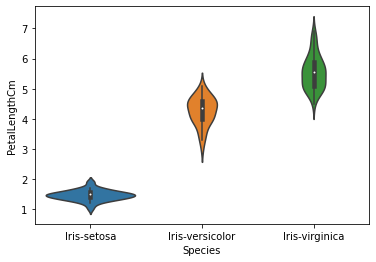

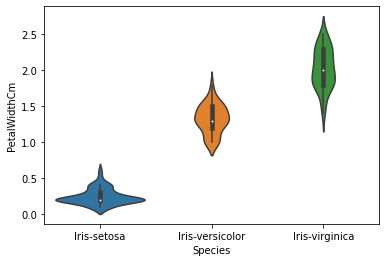

In [15]:
sns.violinplot(x='Species',y='SepalLengthCm', data=df)
plt.show(2,1)
sns.violinplot(x='Species',y='SepalWidthCm', data=df)
plt.show(2,2)
sns.violinplot(x='Species',y='PetalLengthCm', data=df)
plt.show(2,3)
sns.violinplot(x='Species',y='PetalWidthCm', data=df)
plt.show(2,4)

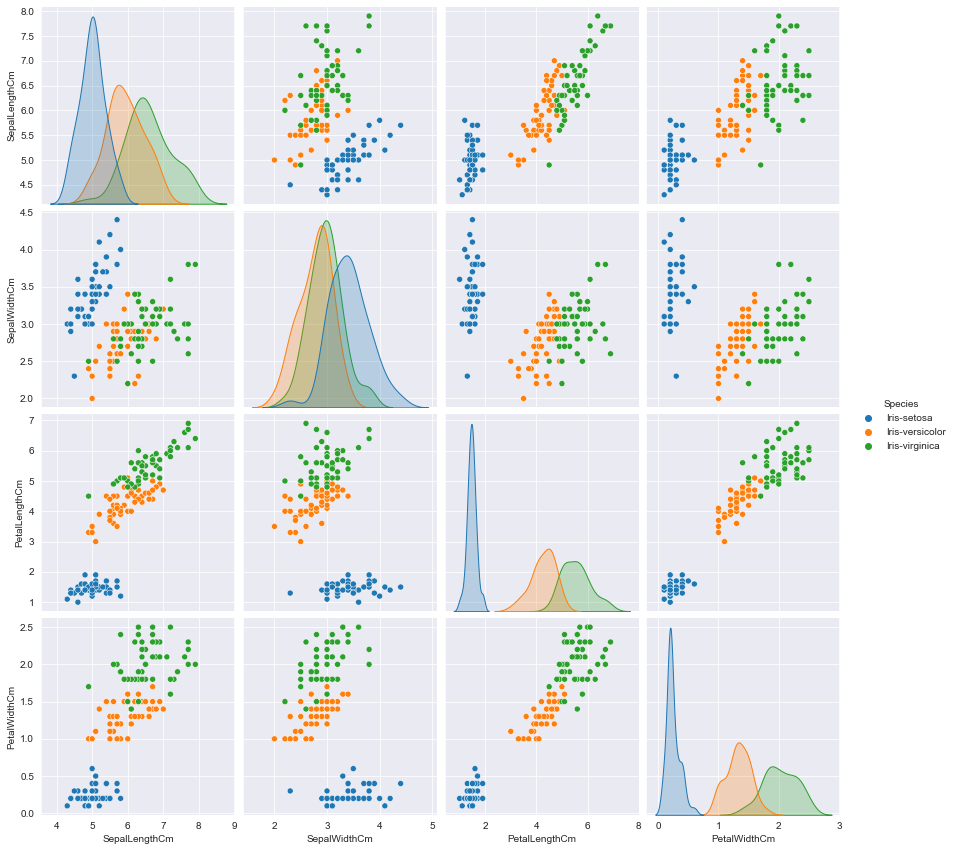

In [16]:
sns.set_style("darkgrid");
sns.pairplot(df, hue="Species", height=3);
plt.show()

In [17]:
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
y = df["Species"]


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
pred_dt = DT.predict(x_test)

In [21]:
DT.score(x_test, y_test)

0.9666666666666667

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [23]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, pred_dt)

In [24]:
print(cf)

[[12  0  0]
 [ 0  7  0]
 [ 0  1 10]]


In [25]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
#iris = datasets.load_iris()
#X = iris.data
#Y = iris.target

In [27]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)
clf.fit(x_train,y_train)
clf.predict(x_test)

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa'], dtype=object)

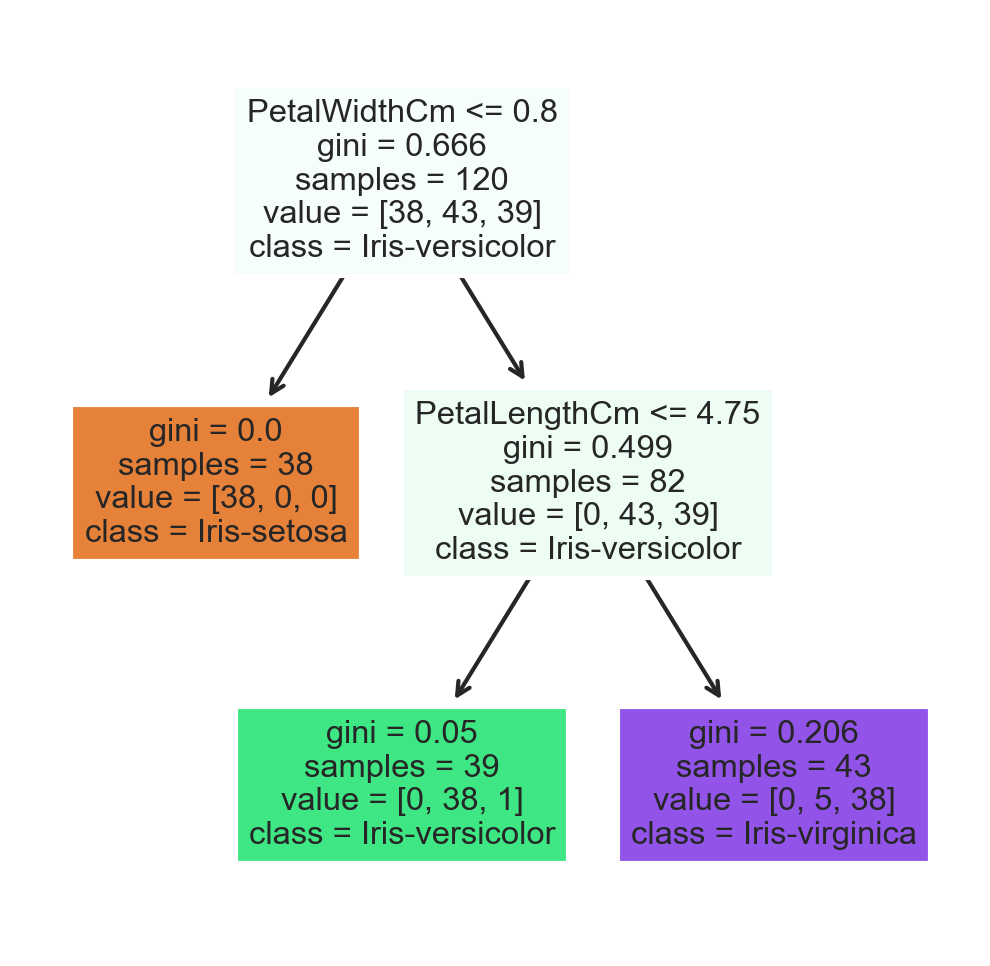

In [28]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Iris-setosa','Iris-versicolor','Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = fn, class_names=cn,filled = True);
fig.savefig('imagename.png')